import libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


Load Dataset

In [2]:
data = pd.read_csv('crop_residue_dataset_p.csv')
data.head()


,Farmer_ID,Crop_Type,Residue_Type,Residue_Quantity (kg/acre),Soil_Type,Moisture_Level (%),Cost_of_Collection (₹/kg),Market_Price (₹/kg),Burning_Cost (₹/acre),Alternative_Uses,Profitability_Score
0,F001,3,1,1.000000,2,0.75,0.590604,0.193333,0.693333,3,3
1,F002,0,2,0.090176,2,1.00,0.778523,0.853333,0.420000,1,5
2,F003,2,0,0.563224,1,0.55,0.510067,0.693333,0.066667,4,5
3,F004,1,3,0.946599,0,1.00,0.080537,0.300000,0.983333,4,5
4,F005,0,2,0.959194,0,0.30,0.859060,0.693333,0.323333,1,1


check missing values

In [3]:
data.isnull().sum()


Farmer_ID                     0
Crop_Type                     0
Residue_Type                  0
Residue_Quantity (kg/acre)    0
Soil_Type                     0
Moisture_Level (%)            0
Cost_of_Collection (₹/kg)     0
Market_Price (₹/kg)           0
Burning_Cost (₹/acre)         0
Alternative_Uses              0
Profitability_Score           0
dtype: int64

Encode Categorial Columns

In [4]:
label_encoders = {}
for column in data.select_dtypes(include='object').columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le
data.head()


,Farmer_ID,Crop_Type,Residue_Type,Residue_Quantity (kg/acre),Soil_Type,Moisture_Level (%),Cost_of_Collection (₹/kg),Market_Price (₹/kg),Burning_Cost (₹/acre),Alternative_Uses,Profitability_Score
0,0,3,1,1.000000,2,0.75,0.590604,0.193333,0.693333,3,3
1,1,0,2,0.090176,2,1.00,0.778523,0.853333,0.420000,1,5
2,2,2,0,0.563224,1,0.55,0.510067,0.693333,0.066667,4,5
3,3,1,3,0.946599,0,1.00,0.080537,0.300000,0.983333,4,5
4,4,0,2,0.959194,0,0.30,0.859060,0.693333,0.323333,1,1


Split Features and Target

In [5]:
X = data.drop('Crop_Type', axis=1)  # replace 'Crop_Type' with your target column
y = data['Crop_Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Train Model

In [7]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Evaluate Model

In [8]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%\n")
print(classification_report(y_test, y_pred))


Accuracy: 100.00%

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00        18

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



Feature Importance Visualization

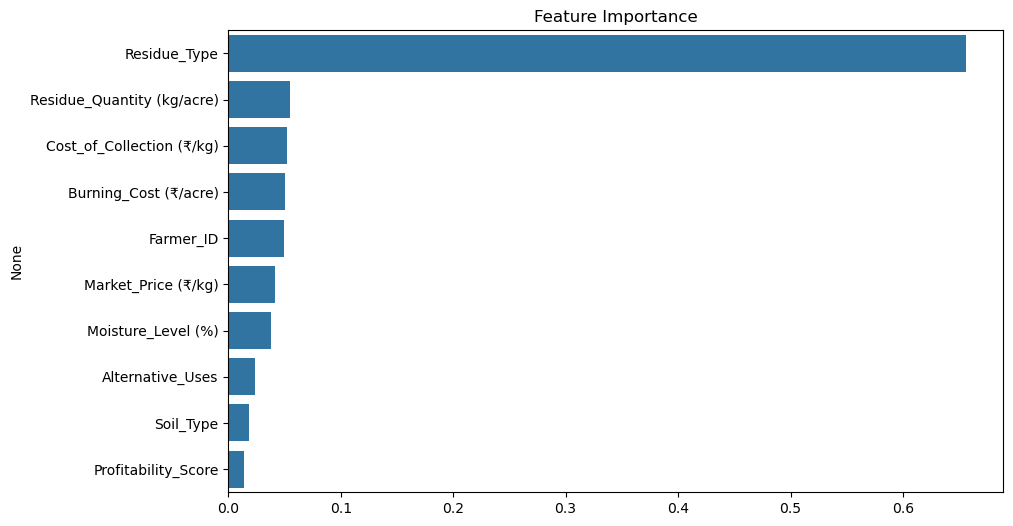

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances = feat_importances.sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feat_importances.values, y=feat_importances.index)
plt.title('Feature Importance')
plt.show()
